In [1]:
#checking the underground truth(actual unseen dataset)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("results.csv")
df.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [2]:
df.describe()

,text,sentiment
count,3534,3534
unique,3530,3
top,#NAME?,neutral
freq,5,1430


In [3]:
df.shape

(3534, 2)

In [4]:
df.dropna(axis = 0,inplace = True)
df.shape

(3534, 2)

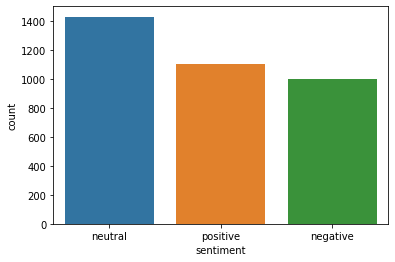

In [5]:
sns.countplot(df['sentiment'])

In [6]:
#removal of stop words
import nltk #nlp library
from nltk.corpus import stopwords
stop = stopwords.words("english")
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,text,sentiment
0,Last session day http://twitpic.com/67ezh,neutral
1,Shanghai also really exciting (precisely -- sk...,positive
2,"Recession hit Veronique Branquinho, quit compa...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [7]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
df['text'] = df['text'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
df.head()

,text,sentiment
0,last session day http://twitpic.com/67ezh,neutral
1,shanghai also realli excit (precis -- skyscrap...,positive
2,"recess hit veroniqu branquinho, quit company, ...",negative
3,happi bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [8]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
df.head()

,text,sentiment
0,last session day http://twitpic.com/67ezh,neutral
1,shanghai also realli excit (precis -- skyscrap...,positive
2,"recess hit veroniqu branquinho, quit company, ...",negative
3,happi bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [9]:
#removing punctuation
import re
def remove_punct(text):
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    text = re.sub('http?://[A-Za-z0-9./]+','',text) #removes any https links
    return text
df['text'] = df['text'].apply(remove_punct)
df.head()

,text,sentiment
0,last session day http twitpic com ezh,neutral
1,shanghai also realli excit precis skyscrap...,positive
2,recess hit veroniqu branquinho quit company ...,negative
3,happi bday,positive
4,http twitpic com wp I like it,positive


In [14]:
#Spell correction
from textblob import TextBlob
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0               last session day http   twitpic com eh
1    shanghai also really exit  precise    skyscrap...
2    recess hit veroniqu branquinho  quit company  ...
3                                           happy day 
4                  http   twitpic com up   I like it  
Name: text, dtype: object

In [15]:
#capitalizing the tweets
df['text'] = df['text'].apply(lambda x: " ".join([word.upper() for word in x.split()]))
df['text'].head()

0                LAST SESSION DAY HTTP TWITPIC COM EZH
1    SHANGHAI ALSO REALLI EXCIT PRECIS SKYSCRAP GAL...
2    RECESS HIT VERONIQU BRANQUINHO QUIT COMPANY SHAME
3                                           HAPPI BDAY
4                        HTTP TWITPIC COM WP I LIKE IT
Name: text, dtype: object

In [16]:
#tokenizing

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def token(text):
    return tknzr.tokenize(text)
df['tokenized'] = df['text'].apply(token) 
df.head()


,text,sentiment,tokenized
0,LAST SESSION DAY HTTP TWITPIC COM EZH,neutral,"[LAST, SESSION, DAY, HTTP, TWITPIC, COM, EZH]"
1,SHANGHAI ALSO REALLI EXCIT PRECIS SKYSCRAP GAL...,positive,"[SHANGHAI, ALSO, REALLI, EXCIT, PRECIS, SKYSCR..."
2,RECESS HIT VERONIQU BRANQUINHO QUIT COMPANY SHAME,negative,"[RECESS, HIT, VERONIQU, BRANQUINHO, QUIT, COMP..."
3,HAPPI BDAY,positive,"[HAPPI, BDAY]"
4,HTTP TWITPIC COM WP I LIKE IT,positive,"[HTTP, TWITPIC, COM, WP, I, LIKE, IT]"


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=5000, max_df=0.7)  
x = tfidfconverter.fit_transform(df['text']).toarray()

In [31]:
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

y = df['sentiment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter = 1000000)
#scores = cross_val_score(lr, x_train,y_train, cv=10)
logreg = lr.fit(x_train,y_train)
prediction = logreg.predict(x_test)
metrics.accuracy_score(y_test,prediction)

0.6294200848656294

In [33]:
metrics.confusion_matrix(y_test, prediction)

array([[104, 115,  11],
       [ 23, 206,  29],
       [  4,  80, 135]], dtype=int64)

In [34]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    negative       0.79      0.45      0.58       230
     neutral       0.51      0.80      0.63       258
    positive       0.77      0.62      0.69       219

    accuracy                           0.63       707
   macro avg       0.69      0.62      0.63       707
weighted avg       0.68      0.63      0.63       707



In [35]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()
naive.fit(x_train, y_train)
prediction = naive.predict(x_test)

metrics.accuracy_score(y_test, prediction)

0.5615275813295615

In [36]:
metrics.confusion_matrix(y_test, prediction)

array([[ 63, 155,  12],
       [ 13, 220,  25],
       [  2, 103, 114]], dtype=int64)

In [37]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    negative       0.81      0.27      0.41       230
     neutral       0.46      0.85      0.60       258
    positive       0.75      0.52      0.62       219

    accuracy                           0.56       707
   macro avg       0.67      0.55      0.54       707
weighted avg       0.66      0.56      0.54       707

